# 1、魔塔社区平台介绍
魔塔社区属于国内网站，网速快但是模型没有Huggingface全面，找模型优先在魔塔社区找，如果找不到则前往Huggingface找。

[魔塔社区网址](https://modelscope.cn/home)
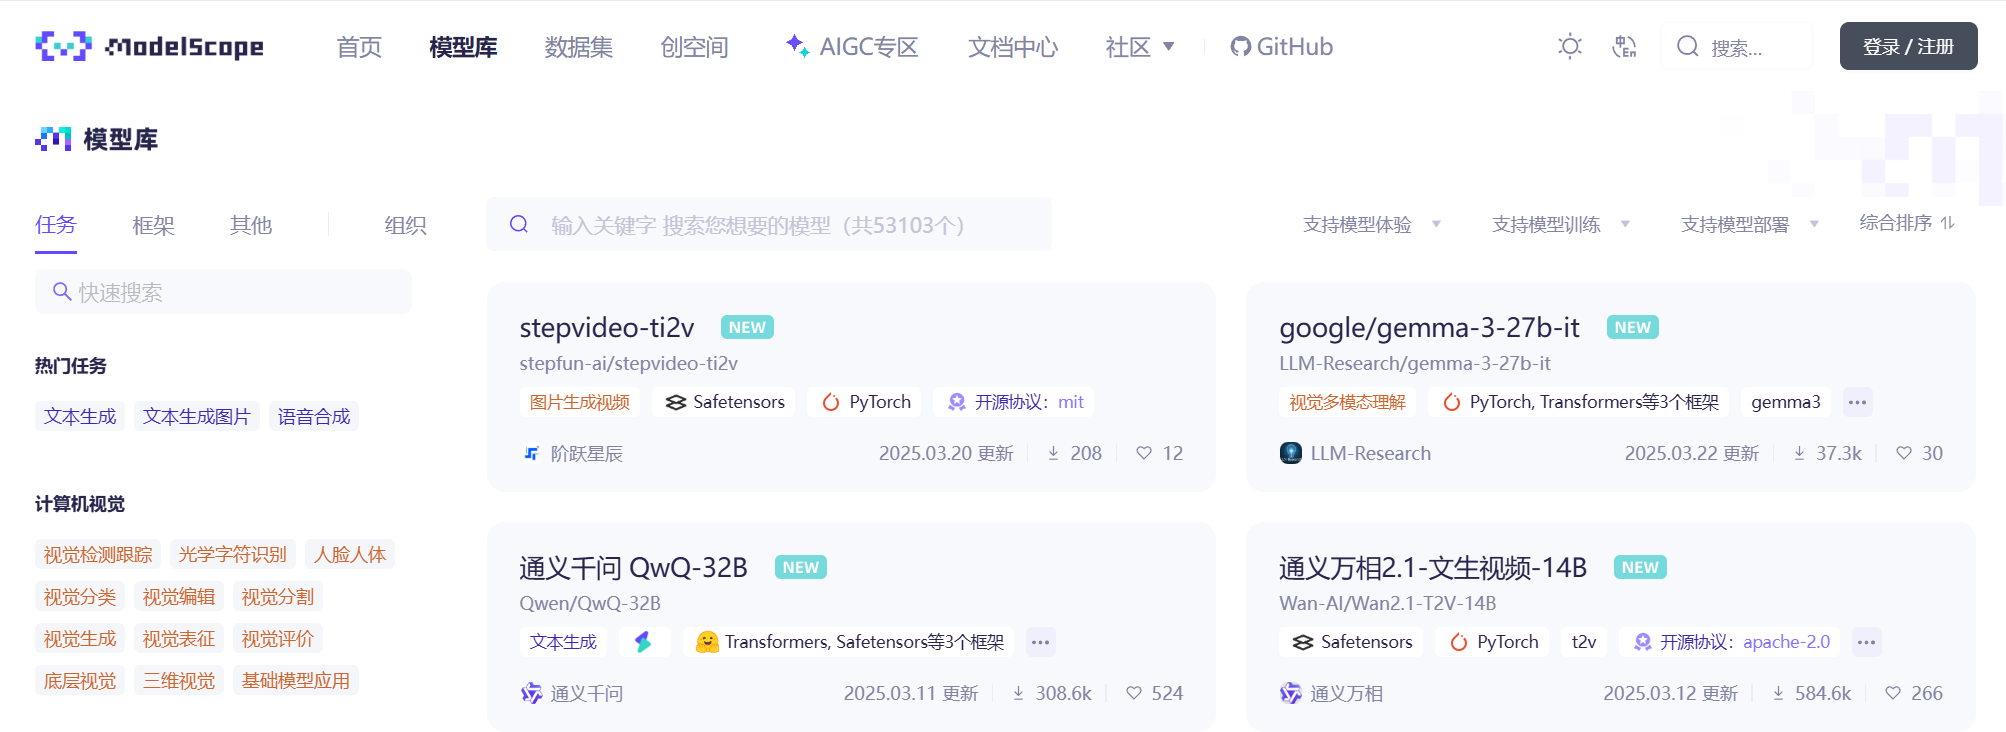



## 魔塔社区免费服务器
登录后搜索一个模型

![alt text](Image/image-1.png)

![alt text](Image/image-2.png)

![alt text](Image/image-3.png)



## 魔塔社区下载模型方法
### 下载准备
首先搜索模型，然后进入模型页面，点击“模型文件”--》“下载模型”

![alt text](Image/image-4.png)

在下载前，先通过如下命令安装ModelScope

![alt text](Image/image-5.png)


命令行下载，推荐采用“SDK下载”，“Git下载”容易出现秒下载完成但是没有实际文件的情况




![](Image/![模型下载](2025-03-23-18-26-30.png).png)

### 在服务器中部署模型方法
一般本地电脑如果没有16G显存就不要在本地部署大模型了，直接部署到服务器上。以AutoDl服务器为例：


#### 首先要安装modelscope

In [ ]:
pip install modelscope

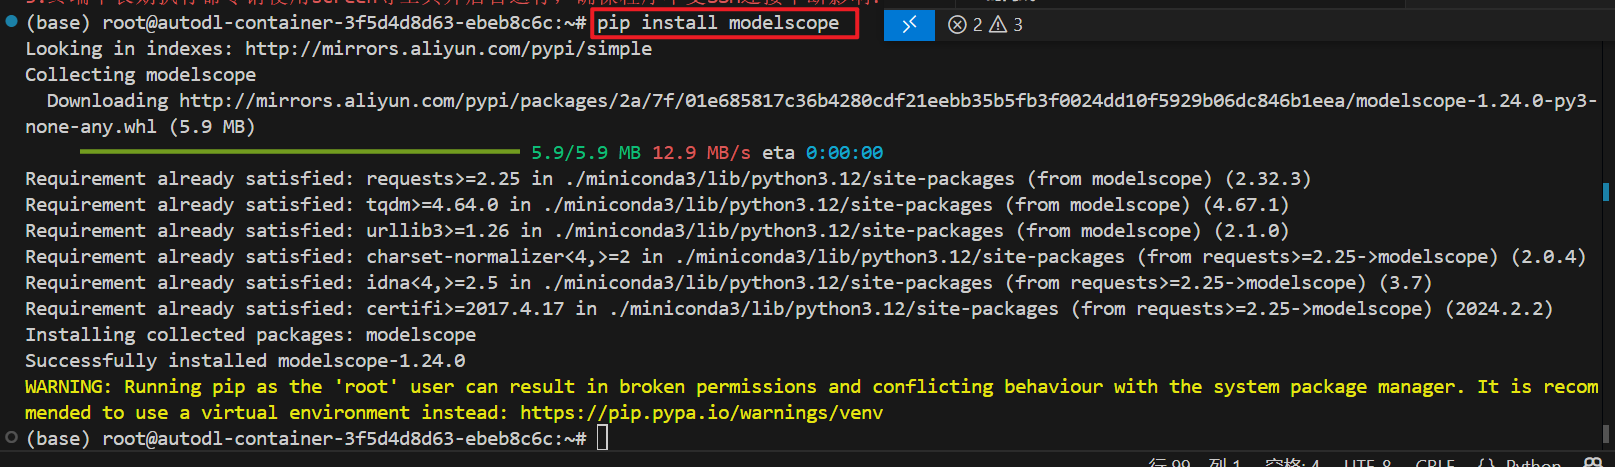

#### 定义模型存储路径
如果不定义模型存储路径，文件会被存储到缓存路径下，但是有时候软件没有访问该路径的权限，所以要自定义路径。
方法是cache_dir参数
![](Image/2025-03-23-20-49-47.png)



修改后的代码：
![](Image/2025-03-23-20-52-48.png)

#### 模型下载-download.py

In [ ]:
from modelscope import snapshot_download
model_dir = snapshot_download('Qwen/Qwen2.5-0.5B-Instruct', cache_dir="/root/autodl-tmp/model/")


在远程服务器中执行代码：

![](Image/2025-03-23-20-41-52.png)

需要注意的是，有的时候下载完成并不会在最下方提示，反而在上面有下载成功的提示
![](Image/2025-03-23-20-47-06.png)

如果不放心，可以再次执行一下.py文件，因为魔塔社区下载文件会检查文件模型是否已经下载到目标目录以及目录是否已经损坏。如果没有损坏就不会再次下载
![](Image/2025-03-23-21-04-58.png)

有的时候从魔塔社区下载的模型会有两份，这两个是一模一样的内容，可以删除其中一份都没有关系

![](Image/2025-03-23-21-07-46.png)

## 使用transformer加载qwen模型-test01.py
这种方式一般不会正式使用，因为transformer平台跑模型的效率低，但是可以协助我们更好的理解模型的调用过程。

In [ ]:
#使用transformer加载qwen模型，AutoModelForCausalLM,AutoTokenizer可以自动适应模型和分词器
from transformers import AutoModelForCausalLM,AutoTokenizer

DEVICE = "cuda"

#加载本地模型路径为该模型配置文件所在的根目录
model_dir = "/home/aron/llm/Qwen/Qwen2.5-0.5B-Instruct"

#使用transformer加载模型，device_map指的是config.json里面的  "torch_dtype"这里是 "bfloat16",也可以用"auto"
model = AutoModelForCausalLM.from_pretrained(model_dir,torch_dtype="auto",device_map="auto")
#加载分词器
tokenizer = AutoTokenizer.from_pretrained(model_dir)

#调用模型
#定义提示词
prompt = "你好，请介绍下你自己。"
#将提示词封装为message
message = [{"role":"system","content":"You are a helpful assistant system"},{"role":"user","content":prompt}]
#使用分词器的apply_chat_template()方法将上面定义的消息列表进行转换，即将字符转换为input_ids;
# tokenize=False表示此时不进行令牌化,即暂时不将文本字符转换为input_ids,下一步会进行令牌化
text = tokenizer.apply_chat_template(message,tokenize=False,add_generation_prompt=True)

#将处理后的文本令牌化并转换为模型的输入张量，"pt"表示返回的张量是pytorch张量
model_inputs = tokenizer([text],return_tensors="pt").to(DEVICE)

#将数据输入模型得到输出
response = model.generate(model_inputs.input_ids,max_new_tokens=512)
print(response)

#对输出的内容进行解码还原，batch_decode批量解码，skip_special_tokens=True表示跳过特殊令牌（即不带特殊符号）
response = tokenizer.batch_decode(response,skip_special_tokens=True)
print(response)

# 2、Ollama部署大模型
[Ollama官网](https://ollama.com/)

## Linux系统服务器安装Ollama方法

![](Image/2025-03-24-00-12-22.png)

![](Image/2025-03-24-00-12-57.png)

### 创建虚拟环境

In [ ]:
conda create -n envOllama

ollama对Python没有版本要求，所以无需指定Python版本

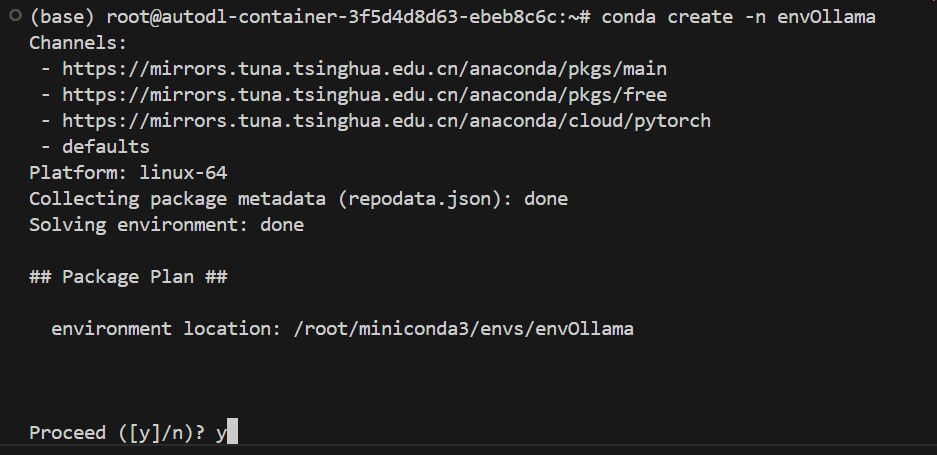

激活ollama环境

In [ ]:
conda activate envOllama

![](Image/2025-03-24-00-21-52.png)

复制下载链接，在命令行中执行下载

![](Image/2025-03-24-00-32-23.png)

如果环境报错可以删除环境重新创建

![](Image/2025-03-24-00-35-03.png)

激活ollama环境

In [ ]:
conda activate envOllama

![](Image/2025-03-24-00-40-27.png)

# 3、vLLM部署大模型

# 4、LMDeploy部署大模型
